# Exploratory analysis

Kaggle competition https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting

In [1]:
from sklearn_pandas import DataFrameMapper
from sklearn import pipeline, preprocessing, linear_model

## Aggregating store information

I wrote a separate notebook to deal with information about stores, including their geographical location. In addition to the named cities and districts, I ran a KMeans clustering model to divide stores in regions.

__main__


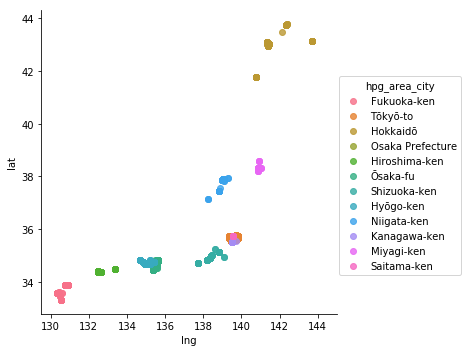


 0 
 Fukuoka-ken    127
Name: air_area_city, dtype: int64 
 Fukuoka-ken    380
Name: hpg_area_city, dtype: int64

 1 
 Tōkyō-to    444
Name: air_area_city, dtype: int64 
 Tōkyō-to        2076
Kanagawa-ken      61
Saitama-ken       11
Name: hpg_area_city, dtype: int64

 2 
 Ōsaka-fu     74
Hyōgo-ken    57
Name: air_area_city, dtype: int64 
 Ōsaka-fu            514
Hyōgo-ken           331
Osaka Prefecture    145
Name: hpg_area_city, dtype: int64

 3 
 Hokkaidō    46
Name: air_area_city, dtype: int64 
 Hokkaidō    298
Name: hpg_area_city, dtype: int64

 4 
 Miyagi-ken    17
Name: air_area_city, dtype: int64 
 Miyagi-ken    139
Name: hpg_area_city, dtype: int64

 5 
 Hiroshima-ken    32
Name: air_area_city, dtype: int64 
 Hiroshima-ken    245
Name: hpg_area_city, dtype: int64

 6 
 Shizuoka-ken    18
Name: air_area_city, dtype: int64 
 Shizuoka-ken    231
Name: hpg_area_city, dtype: int64

 7 
 Niigata-ken    14
Name: air_area_city, dtype: int64 
 Niigata-ken    142
Name: hpg_area_city, d

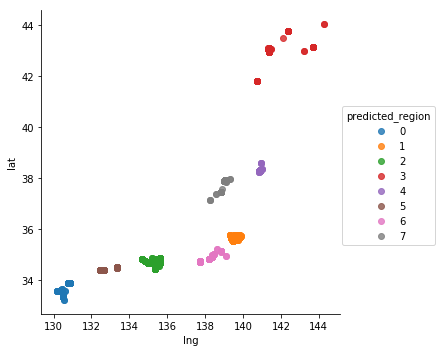

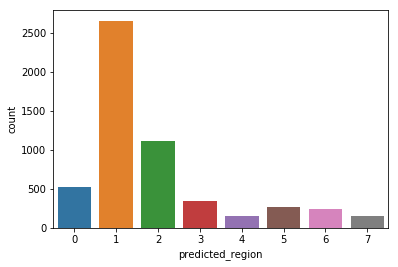

IndentationError: expected an indented block (<ipython-input-2-655309becae6>, line 2)

In [2]:
%run -n RestaurantLocation.ipynb

In [3]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 5455
Data columns (total 19 columns):
air_store_id         829 non-null object
air_genre_name       829 non-null object
air_area_name        829 non-null object
latitude_air         829 non-null float64
longitude_air        829 non-null float64
hpg_store_id         4777 non-null object
hpg_genre_name       4690 non-null object
hpg_area_name        4690 non-null object
latitude_hpg         4690 non-null float64
longitude_hpg        4690 non-null float64
hpg_area_city        4573 non-null object
hpg_area_district    4564 non-null object
hpg_area_extra       3104 non-null object
air_area_city        829 non-null object
air_area_district    829 non-null object
air_area_extra       826 non-null object
lat                  5456 non-null float64
lng                  5456 non-null float64
predicted_region     5456 non-null int32
dtypes: float64(6), int32(1), object(12)
memory usage: 991.2+ KB


In [4]:
stores.head()

,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,hpg_area_city,hpg_area_district,hpg_area_extra,air_area_city,air_area_district,air_area_extra,lat,lng,predicted_region
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN,NaN,NaN,NaN,NaN,None,None,None,Hyōgo-ken,Kōbe-shi,Kumoidōri,34.695124,135.197852,2
1,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN,NaN,NaN,NaN,NaN,None,None,None,Hyōgo-ken,Kōbe-shi,Kumoidōri,34.695124,135.197852,2
2,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN,NaN,NaN,NaN,NaN,None,None,None,Hyōgo-ken,Kōbe-shi,Kumoidōri,34.695124,135.197852,2
3,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,None,None,None,Tōkyō-to,Minato-ku,Shibakōen,35.658068,139.751599,1
4,air_99c3eae84130c1cb,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,None,None,None,Tōkyō-to,Minato-ku,Shibakōen,35.658068,139.751599,1


There are 5456 stores with available information.

## Date information

Information about date include day of week and holiday. We can extend this to create flags for holiday eve, work day and work night (meaning next day is work day).

In [5]:
date_info = pandas.read_csv('Data/date_info.csv')

In [6]:
holidays = date_info['holiday_flg']
date_info['holiday_eve'] = list(holidays[1:]) + [0]
date_info['work_day'] = date_info.apply(lambda x: (x['day_of_week'] not in ['Saturday','Sunday'])&(x['holiday_flg']==0), axis=1)
date_info['work_night'] = date_info.apply(lambda x: (x['day_of_week'] not in ['Friday','Saturday'])&(x['holiday_eve']==0), axis=1)

In [7]:
date_info.tail()

,calendar_date,day_of_week,holiday_flg,holiday_eve,work_day,work_night
512,2017-05-27,Saturday,0,0,False,False
513,2017-05-28,Sunday,0,0,False,True
514,2017-05-29,Monday,0,0,True,True
515,2017-05-30,Tuesday,0,0,True,True
516,2017-05-31,Wednesday,0,0,True,True


## Visit information 

There is information about aggregate visits to restaurants with the AIR system.

In [8]:
data_visit = pandas.read_csv('Data/air_visit_data.csv').merge(
    stores, how='left', on='air_store_id'
).merge(
    date_info, how='left', left_on='visit_date', right_on='calendar_date'
)

In [9]:
data_visit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252108 entries, 0 to 252107
Data columns (total 27 columns):
air_store_id         252108 non-null object
visit_date           252108 non-null object
visitors             252108 non-null int64
air_genre_name       252108 non-null object
air_area_name        252108 non-null object
latitude_air         252108 non-null float64
longitude_air        252108 non-null float64
hpg_store_id         46019 non-null object
hpg_genre_name       20098 non-null object
hpg_area_name        20098 non-null object
latitude_hpg         20098 non-null float64
longitude_hpg        20098 non-null float64
hpg_area_city        19343 non-null object
hpg_area_district    19343 non-null object
hpg_area_extra       14686 non-null object
air_area_city        252108 non-null object
air_area_district    252108 non-null object
air_area_extra       251124 non-null object
lat                  252108 non-null float64
lng                  252108 non-null float64
predicted_re

In [10]:
data_visit.tail()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,...,air_area_extra,lat,lng,predicted_region,calendar_date,day_of_week,holiday_flg,holiday_eve,work_day,work_night
252103,air_24e8414b9b07decb,2017-04-18,6,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,NaN,NaN,NaN,...,Higashi,35.653217,139.711036,1,2017-04-18,Tuesday,0,0,True,True
252104,air_24e8414b9b07decb,2017-04-19,6,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,NaN,NaN,NaN,...,Higashi,35.653217,139.711036,1,2017-04-19,Wednesday,0,0,True,True
252105,air_24e8414b9b07decb,2017-04-20,7,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,NaN,NaN,NaN,...,Higashi,35.653217,139.711036,1,2017-04-20,Thursday,0,0,True,True
252106,air_24e8414b9b07decb,2017-04-21,8,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,NaN,NaN,NaN,...,Higashi,35.653217,139.711036,1,2017-04-21,Friday,0,0,True,False
252107,air_24e8414b9b07decb,2017-04-22,5,Other,Tōkyō-to Shibuya-ku Higashi,35.653217,139.711036,NaN,NaN,NaN,...,Higashi,35.653217,139.711036,1,2017-04-22,Saturday,0,0,False,False


Aggregate information per day.

In [11]:
total_visitors = data_visit.groupby('visit_date').sum()['visitors']
total_restaurants = data_visit.groupby('visit_date').count()['visitors']

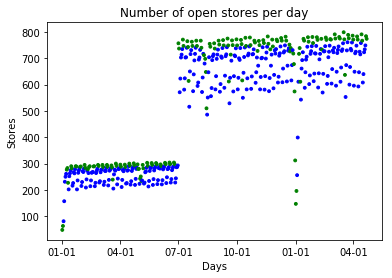

In [12]:
fig, ax = py.subplots()
colors = ['g' if x==0 else 'b' for x in date_info['work_night']]
ax.scatter(x=range(len(total_restaurants)),y=total_restaurants, color=colors, s=8)
ax.set_title('Number of open stores per day');
ax.set_ylabel('Stores');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');

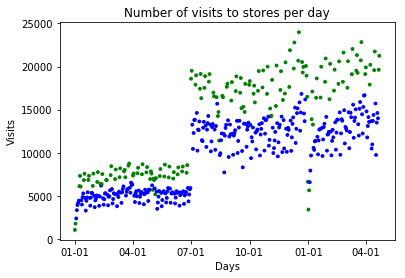

In [13]:
fig, ax = py.subplots()
colors = ['g' if x==0 else 'b' for x in date_info['work_night']]
ax.scatter(x=range(len(total_visitors)),y=total_visitors, color=colors, s=8)
ax.set_title('Number of visits to stores per day');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');

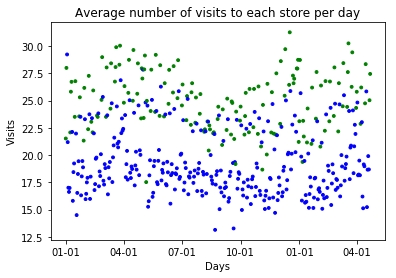

In [14]:
fig, ax = py.subplots()
average = total_visitors / total_restaurants
colors = ['g' if x==0 else 'b' for x in date_info['work_night']]
ax.scatter(x=range(len(average)),y=average, color=colors, s=8)
ax.set_title('Average number of visits to each store per day');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');

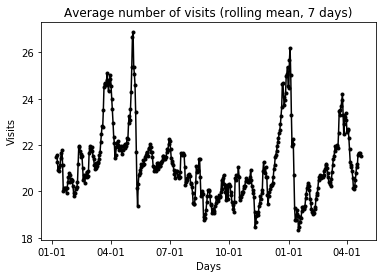

In [15]:
fig, ax = py.subplots()
average_rolling = pandas.Series(average).rolling(window=7).mean()
ax.plot(average_rolling, 'k.-')
ax.set_title('Average number of visits (rolling mean, 7 days)');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');


There is a difference in the service after 2016-07-01. The number of listed restaurants goes up instantly, apparently a lot of restaurants signed up for the AIR service on this day. The average number of visitors to each store does not change appreciably, being around 15-30 for the whole period.

## Reservation information with AIR and HPG

There is information about individual reservations to restaurants with the AIR and HPG systems.

In [16]:
data_reserve_air = pandas.read_csv('Data/air_reserve.csv').merge(
    stores, how='left', on='air_store_id'
)
data_reserve_air['visit_date'] = data_reserve_air['visit_datetime'].apply(lambda x:x[:10])
data_reserve_air['visit_hour'] = data_reserve_air['visit_datetime'].apply(lambda x:int(x[11:13]))
data_reserve_air['reserve_date'] = data_reserve_air['reserve_datetime'].apply(lambda x:x[:10])
data_reserve_air['reserve_hour'] = data_reserve_air['reserve_datetime'].apply(lambda x:int(x[11:13]))
data_reserve_air = data_reserve_air.merge(
    date_info, how='left', left_on='visit_date', right_on='calendar_date', suffixes=('_visit','')
)
data_reserve_air['service']='AIR'

In [17]:
data_reserve_air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92378 entries, 0 to 92377
Data columns (total 33 columns):
air_store_id         92378 non-null object
visit_datetime       92378 non-null object
reserve_datetime     92378 non-null object
reserve_visitors     92378 non-null int64
air_genre_name       92378 non-null object
air_area_name        92378 non-null object
latitude_air         92378 non-null float64
longitude_air        92378 non-null float64
hpg_store_id         36264 non-null object
hpg_genre_name       16154 non-null object
hpg_area_name        16154 non-null object
latitude_hpg         16154 non-null float64
longitude_hpg        16154 non-null float64
hpg_area_city        15457 non-null object
hpg_area_district    15457 non-null object
hpg_area_extra       13092 non-null object
air_area_city        92378 non-null object
air_area_district    92378 non-null object
air_area_extra       91958 non-null object
lat                  92378 non-null float64
lng                  92378 

In [18]:
data_reserve_air.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,...,visit_hour,reserve_date,reserve_hour,calendar_date,day_of_week,holiday_flg,holiday_eve,work_day,work_night,service
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,hpg_bcecaa70222d94e5,Spain Bar/Italian Bar,...,18,2017-04-17,19,2017-05-29,Monday,0,0,True,True,AIR
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,Izakaya,Tōkyō-to Kōtō-ku Tomioka,35.671270,139.796987,hpg_8072ff2fb418e273,Japanese style,...,23,2017-04-19,17,2017-05-30,Tuesday,0,0,True,True,AIR
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,...,20,2017-04-12,23,2017-05-31,Wednesday,0,0,True,True,AIR
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10,Italian/French,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,hpg_2864fa16b03e3813,NaN,...,20,2017-04-19,16,2017-05-31,Wednesday,0,0,True,True,AIR
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3,Japanese food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,NaN,NaN,...,21,2017-04-22,10,2017-05-31,Wednesday,0,0,True,True,AIR


In [19]:
data_reserve_hpg = pandas.read_csv('Data/hpg_reserve.csv').merge(
    stores, how='left', on='hpg_store_id'
)
data_reserve_hpg['visit_date'] = data_reserve_hpg['visit_datetime'].apply(lambda x:x[:10])
data_reserve_hpg['visit_hour'] = data_reserve_hpg['visit_datetime'].apply(lambda x:int(x[11:13]))
data_reserve_hpg['reserve_date'] = data_reserve_hpg['reserve_datetime'].apply(lambda x:x[:10])
data_reserve_hpg['reserve_hour'] = data_reserve_hpg['reserve_datetime'].apply(lambda x:int(x[11:13]))
data_reserve_hpg = data_reserve_hpg.merge(
    date_info, how='left', left_on='visit_date', right_on='calendar_date', suffixes=('_visit','')
)
data_reserve_hpg['service']='HPG'

In [20]:
data_reserve_hpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000320 entries, 0 to 2000319
Data columns (total 33 columns):
hpg_store_id         object
visit_datetime       object
reserve_datetime     object
reserve_visitors     int64
air_store_id         object
air_genre_name       object
air_area_name        object
latitude_air         float64
longitude_air        float64
hpg_genre_name       object
hpg_area_name        object
latitude_hpg         float64
longitude_hpg        float64
hpg_area_city        object
hpg_area_district    object
hpg_area_extra       object
air_area_city        object
air_area_district    object
air_area_extra       object
lat                  float64
lng                  float64
predicted_region     float64
visit_date           object
visit_hour           int64
reserve_date         object
reserve_hour         int64
calendar_date        object
day_of_week          object
holiday_flg          int64
holiday_eve          int64
work_day             bool
work_night         

In [21]:
data_reserve_hpg.tail()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_genre_name,...,visit_hour,reserve_date,reserve_hour,calendar_date,day_of_week,holiday_flg,holiday_eve,work_day,work_night,service
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,...,20,2017-04-19,7,2017-05-31,Wednesday,0,0,True,True,HPG
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,...,20,2017-03-19,0,2017-05-31,Wednesday,0,0,True,True,HPG
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49,NaN,NaN,NaN,NaN,NaN,NaN,...,21,2017-04-14,20,2017-05-31,Wednesday,0,0,True,True,HPG
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9,NaN,NaN,NaN,NaN,NaN,Japanese food in general,...,21,2017-04-19,17,2017-05-31,Wednesday,0,0,True,True,HPG
2000319,hpg_0b70de808b55ad1e,2017-05-31 23:00:00,2017-04-21 13:00:00,6,NaN,NaN,NaN,NaN,NaN,Japanese style,...,23,2017-04-21,13,2017-05-31,Wednesday,0,0,True,True,HPG


In [22]:
data_reserve = pandas.concat([data_reserve_hpg,data_reserve_air])

In [23]:
grouped = data_reserve.groupby('visit_date')
visitors = grouped.sum()['reserve_visitors']
restaurants = grouped.count()['lat']

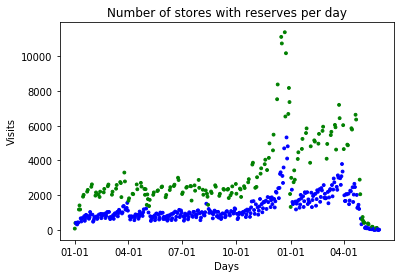

In [24]:
fig, ax = py.subplots()
colors = ['g' if x==0 else 'b' for x in date_info['work_night']]
ax.scatter(x=range(len(restaurants)),y=restaurants, color=colors, s=8)
ax.set_title('Number of stores with reserves per day');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');

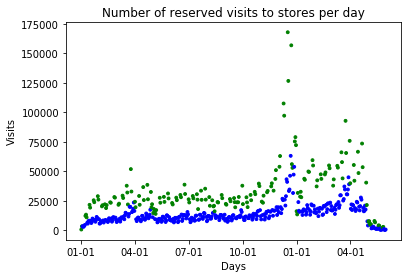

In [25]:
fig, ax = py.subplots()
colors = ['g' if x==0 else 'b' for x in date_info['work_night']]
ax.scatter(x=range(len(visitors)),y=visitors, color=colors, s=8)
ax.set_title('Number of reserved visits to stores per day');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');

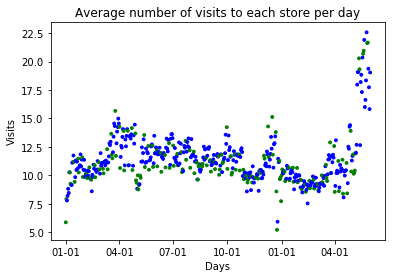

In [26]:
fig, ax = py.subplots()
average = visitors / restaurants
colors = ['g' if x==0 else 'b' for x in date_info['work_night']]
ax.scatter(x=range(len(average)),y=average, color=colors, s=8)
ax.set_title('Average number of visits to each store per day');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');

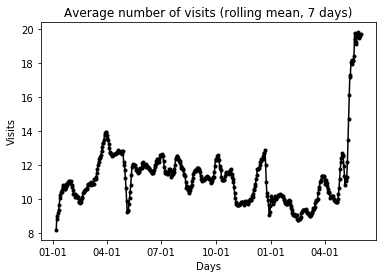

In [27]:
fig, ax = py.subplots()
average_rolling = pandas.Series(average).rolling(window=7).mean()
ax.plot(average_rolling, 'k.-')
ax.set_title('Average number of visits (rolling mean, 7 days)');
ax.set_ylabel('Visits');
ticks = [0,91,182,274,366,456]
ax.set_xticks(ticks);
ax.set_xticklabels([date_info['calendar_date'][x][5:] for x in ax.get_xticks()])
ax.set_xlabel('Days');


# Stores in test set

I want to check if the stores in the test set also appear on the visit and reservation data.

In [28]:
data_test = pandas.read_csv('Data/sample_submission.csv')

In [29]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32019 entries, 0 to 32018
Data columns (total 2 columns):
id          32019 non-null object
visitors    32019 non-null int64
dtypes: int64(1), object(1)
memory usage: 500.4+ KB


In [30]:
data_test.tail()

,id,visitors
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0
32018,air_fff68b929994bfbd_2017-05-31,0


In [31]:
data_test['air_store_id'] = data_test['id'].apply(lambda x: x[:20])
data_test['visit_date'] = data_test['id'].apply(lambda x: x[20:])

In [32]:
data_test.tail()

,id,visitors,air_store_id,visit_date
32014,air_fff68b929994bfbd_2017-05-27,0,air_fff68b929994bfbd,_2017-05-27
32015,air_fff68b929994bfbd_2017-05-28,0,air_fff68b929994bfbd,_2017-05-28
32016,air_fff68b929994bfbd_2017-05-29,0,air_fff68b929994bfbd,_2017-05-29
32017,air_fff68b929994bfbd_2017-05-30,0,air_fff68b929994bfbd,_2017-05-30
32018,air_fff68b929994bfbd_2017-05-31,0,air_fff68b929994bfbd,_2017-05-31


In [33]:
ids_test = data_test['air_store_id'].unique()
ids_air_visit = data_visit['air_store_id'].unique()
ids_air_reserve = data_reserve['air_store_id'].unique()
ids_hpg_visit = data_visit['hpg_store_id'].unique()
ids_hpg_reserve = data_reserve['hpg_store_id'].unique()

In [34]:
stores['has_visit_data'] = stores['air_store_id'].apply(lambda x:x in ids_air_visit) | stores['hpg_store_id'].apply(lambda x:x in ids_hpg_visit)
stores['has_reserve_data'] = stores['air_store_id'].apply(lambda x:x in ids_air_reserve) | stores['hpg_store_id'].apply(lambda x:x in ids_hpg_reserve)
stores['on_test_set'] = stores['air_store_id'].apply(lambda x:x in ids_test)

In [35]:
stores[['has_visit_data','has_reserve_data','on_test_set']].describe()

,has_visit_data,has_reserve_data,on_test_set
count,5456,5456,5456
unique,2,2,2
top,False,True,False
freq,4627,4960,4635


In [36]:
stores_in_TVR = (stores['has_visit_data']) & (stores['has_reserve_data']) & (stores['on_test_set'])
stores_in_TV = (stores['has_visit_data']) & (~stores['has_reserve_data']) & (stores['on_test_set'])
stores_in_TR = (~stores['has_visit_data']) & (stores['has_reserve_data']) & (stores['on_test_set'])
stores_in_VR = (stores['has_visit_data']) & (stores['has_reserve_data']) & (~stores['on_test_set'])
stores_in_T = (~stores['has_visit_data']) & (~stores['has_reserve_data']) & (stores['on_test_set'])
stores_in_V = (stores['has_visit_data']) & (~stores['has_reserve_data']) & (~stores['on_test_set'])
stores_in_R = (~stores['has_visit_data']) & (stores['has_reserve_data']) & (~stores['on_test_set'])
print('{:4d} stores appear on all three lists.'.format(sum(stores_in_TVR)))
print('{:4d} stores appear on test set and visit set only.'.format(sum(stores_in_TV)))
print('{:4d} stores appear on test set and reserve set only'.format(sum(stores_in_TR)))
print('{:4d} stores appear on visit set and reserve set only.'.format(sum(stores_in_VR)))
print('{:4d} stores appear on test set only.'.format(sum(stores_in_T)))
print('{:4d} stores appear on visit set only.'.format(sum(stores_in_V)))
print('{:4d} stores appear on reserve set only.'.format(sum(stores_in_R)))

 333 stores appear on all three lists.
 488 stores appear on test set and visit set only.
   0 stores appear on test set and reserve set only
   0 stores appear on visit set and reserve set only.
   0 stores appear on test set only.
   8 stores appear on visit set only.
4627 stores appear on reserve set only.


The AIR system contains 829 restaurants, of which we must predict visit data for 821. Probably, the remaining 8 have closed.

## Simple model, only visit data

Let us start with a simple model, in which I will use the variables:
* Day of week
* Work day
* Work night
* Location (city)
* Location (district)

In [62]:
features_sklearn = pipeline.FeatureUnion( [
    ('genre', pipeline.Pipeline([
        ('select', DataFrameMapper([('air_genre_name', preprocessing.LabelEncoder())])),
        ('encode', preprocessing.OneHotEncoder(dtype = py.int8)),
    ])),
    ('city', pipeline.Pipeline([
        ('select', DataFrameMapper([('air_area_city', preprocessing.LabelEncoder())])),
        ('encode', preprocessing.OneHotEncoder(dtype = py.int8)),
    ])),
#     ('district', pipeline.Pipeline([
#         ('select', DataFrameMapper([('air_area_district', preprocessing.LabelEncoder())])),
#         ('encode', preprocessing.OneHotEncoder(dtype = py.int8)),
#     ])),
    ('region', pipeline.Pipeline([
        ('select', DataFrameMapper([('predicted_region', preprocessing.LabelEncoder())])),
        ('encode', preprocessing.OneHotEncoder(dtype = py.int8)),
    ])),
    ('day_of_week', pipeline.Pipeline([
        ('select', DataFrameMapper([('day_of_week', preprocessing.LabelEncoder())])),
        ('encode', preprocessing.OneHotEncoder(n_values = 7, dtype = py.int8)),
    ])),
    ('work_day', pipeline.Pipeline([
        ('select', DataFrameMapper([('work_day', preprocessing.LabelEncoder())])),
    ])),
    ('work_night', pipeline.Pipeline([
        ('select', DataFrameMapper([('work_night', preprocessing.LabelEncoder())])),
    ])),
    ('holiday_flg', pipeline.Pipeline([
        ('select', DataFrameMapper([('holiday_flg', preprocessing.LabelEncoder())])),
    ])),
    ('holiday_eve', pipeline.Pipeline([
        ('select', DataFrameMapper([('holiday_eve', preprocessing.LabelEncoder())])),
    ])),
])

In [63]:
model = pipeline.Pipeline([
    ('feature_selection', features_sklearn),
    ('linear_regression', linear_model.LinearRegression())
])

In [64]:
model.fit(data_visit, data_visit['visitors'])

Pipeline(memory=None,
     steps=[('feature_selection', FeatureUnion(n_jobs=1,
       transformer_list=[('genre', Pipeline(memory=None,
     steps=[('select', DataFrameMapper(default=False, df_out=False,
        features=[('air_genre_name', LabelEncoder())], input_df=False,
        sparse=False)), ('encode', OneHotEncoder(cat...('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [65]:
prediction = model.predict(data_visit)

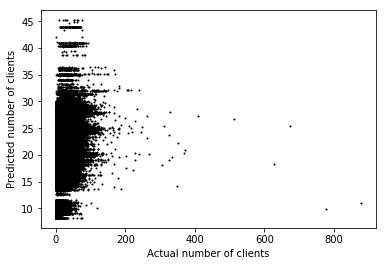

In [66]:
fig, ax = py.subplots()
x_plot = data_visit['visitors']
y_plot = prediction
ax.scatter(x_plot, y_plot, color='k', s=1)
ax.set_xlabel('Actual number of clients')
ax.set_ylabel('Predicted number of clients');

In [67]:
score = model.score(data_visit, data_visit['visitors'])

In [71]:
one_hot_encoding = []
for feature in features_sklearn.transformer_list:
    name = feature[0]
    classes = feature[1].named_steps['select'].features[0][1].classes_
    if len(classes)==2:
        classes = classes[1:]
    for cls in classes:
        one_hot_encoding.append('{}:{}'.format(name,cls))

In [72]:
linear_reg_coeffs = pandas.DataFrame(index = one_hot_encoding)
linear_reg_coeffs['label'] = one_hot_encoding
linear_reg_coeffs['coefficients'] = model.named_steps['linear_regression'].coef_

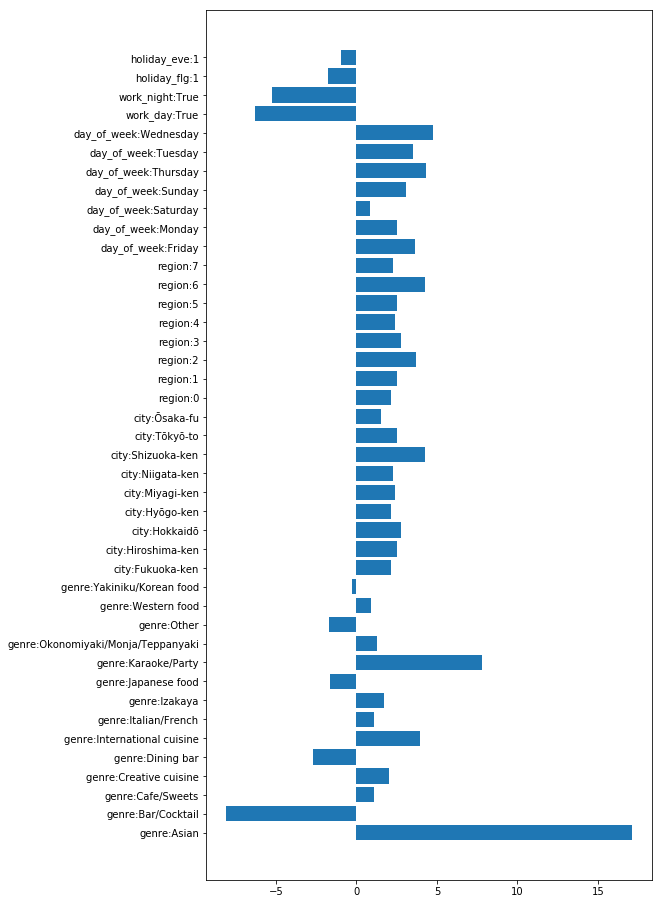

In [74]:
fig,ax = py.subplots(figsize=(8,16))
y_bar = linear_reg_coeffs['coefficients']
x_bar = range(len(y_bar))
ax.barh(x_bar, y_bar)
ax.set_yticks(x_bar);
ax.set_yticklabels(one_hot_encoding);